# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#upload dataset
zs=pd.read_excel('testdata.xlsx')

In [3]:
#displaying dataset
zs.columns

Index(['sleep', 'diet', 'care', 'freq', 'meds', 'coun', 'act', 'break',
       'relax', 'journ', 'social', 'goals', 'self', 'symp', 'age', 'gender',
       'dietrate', 'cry', 'profession', 'field', 'injury', 'negative',
       'valid'],
      dtype='object')

In [4]:
# zs.drop('Timestamp',axis=1,inplace=True)

In [5]:
zs.valid.unique()

array(['Recommend self-help tasks', 'yes ', 'yes  ', 'no', 'yes',
       'recommend self-help tasks'], dtype=object)

## UNDERSTANDING THE DATA

Understanding each attribute 

1) How many hours of sleep did you get last night?                    - sleep<br>
2) Have you been eating regularly and maintaining a healthy diet?     - diet<br>
3) Have you been practicing self-care regularly?                      - care<br>
4) If so how regularly?                                               - freq<br>
5) Have you been taking any medication as prescribed?                 - meds<br>
6) Have you been attending therapy or counseling sessions regularly?  - coun<br>
7) Have you been engaging in physical activity or exercise regularly? - act<br>
8) Have you been taking breaks and practicing relaxation techniques 
   throughout the day?                                                - break<br>
9) If yes, what are some relaxation techniques you practice?          - relax<br>
10)Have you been journaling or practicing mindfulness?                - journ<br>
11)Have you been socializing and connecting with others 
   regularly?                                                         - social<br>
12) Have you been setting and achieving personal goals?               - goals<br>
13) Have you been practicing positive self-talk and challenging 
    negative thoughts?                                                - self<br>
14) Have you been experiencing any physical symptoms related to your 
    mental health, such as headaches or stomach problems?             - symp<br>
15) Do they need therapy?                                             - valid<br>
16) How old are you?                                                  - age<br>
17) What is your Gender ?                                             - gender<br>
18) If yes, rate how healthy your diet is on a scale of 1-10          - dietrate<br>
19) How many times did you cry this week?                             - cry<br>
20) What is your profession?                                          - profession<br>
21) Do you like the field your in?                                    - field<br>
22) Have you ever been in any situation in which you were seriously
injured or feared that you were seriously injured?                    - injury<br>
23) In past week, have you had any negative thoughts or thoughts 
about self-harming?                                                   - negative<br>






In [6]:
zs.head()

,sleep,diet,care,freq,meds,coun,act,break,relax,journ,...,symp,age,gender,dietrate,cry,profession,field,injury,negative,valid
0,6-8,Yes,No,NaN,No,No,Yes,No,NaN,No,...,No,20,Female,7.0,Not at all,College Student,Yes,No,1-3,Recommend self-help tasks
1,6-8,No,No,NaN,No,No,No,Yes,"Deep breathing, Going outdoors, Watching shows...",No,...,Yes,38,Female,6.0,Not at all,Working professional,Yes,Yes,Not at all,yes
2,6-8,Yes,No,NaN,No,Yes,Yes,No,NaN,No,...,Yes,19,Male,4.0,Not at all,College Student,NaN,Yes,Not at all,yes
3,6-8,Yes,Yes,Everyday,No,No,Yes,Yes,Breathing exercises,No,...,No,20,Male,9.0,Not at all,School Student,No,Yes,Not at all,no
4,6-8,No,Yes,Everyday,No,No,No,No,NaN,No,...,No,21,Male,7.0,1-2 times,School Student,Yes,Maybe,1-3,Recommend self-help tasks


In [7]:
zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sleep       251 non-null    object 
 1   diet        251 non-null    object 
 2   care        251 non-null    object 
 3   freq        148 non-null    object 
 4   meds        251 non-null    object 
 5   coun        251 non-null    object 
 6   act         251 non-null    object 
 7   break       251 non-null    object 
 8   relax       72 non-null     object 
 9   journ       251 non-null    object 
 10  social      251 non-null    object 
 11  goals       251 non-null    object 
 12  self        251 non-null    object 
 13  symp        251 non-null    object 
 14  age         251 non-null    int64  
 15  gender      251 non-null    object 
 16  dietrate    233 non-null    float64
 17  cry         251 non-null    object 
 18  profession  251 non-null    object 
 19  field       242 non-null    o

In [8]:
zs.drop('relax',axis=1,inplace=True)

In [9]:
zs.shape

(251, 22)

In [10]:
zs.describe()

,age,dietrate
count,251.000000,233.000000
mean,23.107570,6.004292
std,8.030964,1.806353
min,15.000000,1.000000
25%,20.000000,4.000000
50%,21.000000,6.000000
75%,22.000000,7.000000
max,77.000000,10.000000


In [11]:
zs.valid.unique()

array(['Recommend self-help tasks', 'yes ', 'yes  ', 'no', 'yes',
       'recommend self-help tasks'], dtype=object)

In [12]:
zs.loc[zs.valid=='yes ','valid']='yes'
zs.loc[zs.valid=='yes  ','valid']='yes'
zs.loc[zs.valid=='Recommend self-help tasks','valid']='recommend self-help tasks'


In [13]:
zs.valid.unique()

array(['recommend self-help tasks', 'yes', 'no'], dtype=object)

# Exploratory Data Analysis

## Analysis 1 - Affect of Diet on Mental Health

In [14]:
#Count of people who have a healthy diet or not
zs.valid.value_counts()

recommend self-help tasks    94
no                           87
yes                          70
Name: valid, dtype: int64

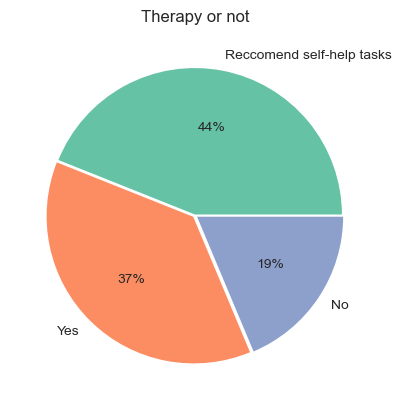

In [15]:
data = [40,34,17]
keys = ['Reccomend self-help tasks','Yes','No']
  
# declaring exploding pie
explode = [0, 0.01,0.01]
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.title("Therapy or not")
plt.show()

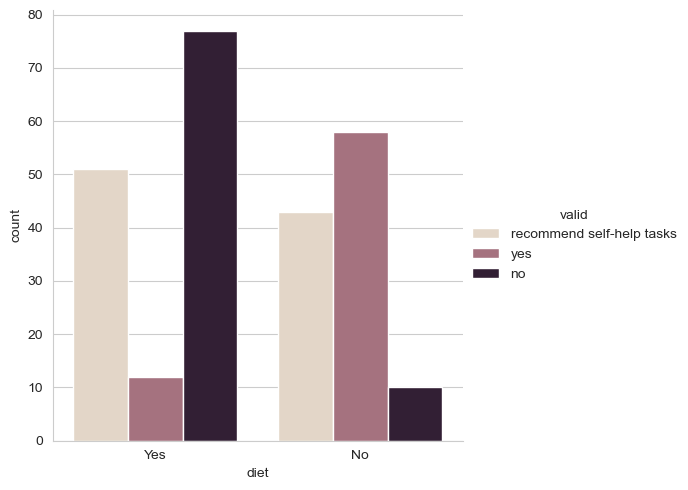

In [16]:
sns.catplot(x="diet", hue="valid", kind="count",palette='ch:.20', data=zs)


As we can see from the above graph, people who have a healthy diet are mentally seen to be healthier. Of all the people reccomended therapy, 32 do not have a healthy diet in contrast to the 7 who do.

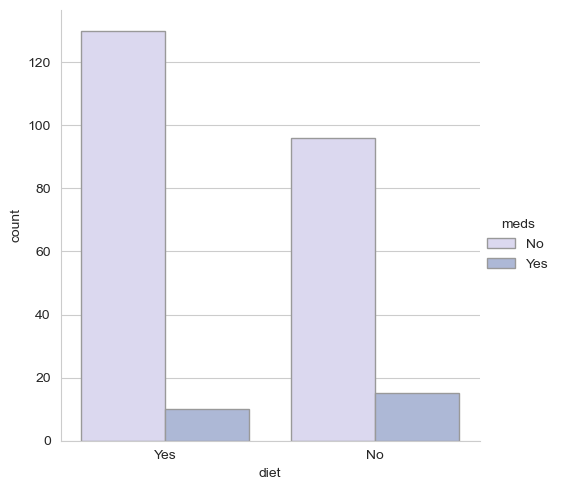

In [17]:
palette=sns.color_palette("ch:11")
sns.catplot(
    data=zs, x="diet", hue="meds", kind="count",
    palette=palette, edgecolor=".6",
)

The graph above indicates people who aren't on medication tend to have a healthy diet.

## Analysis 2 - Physical Exercise and Sleep

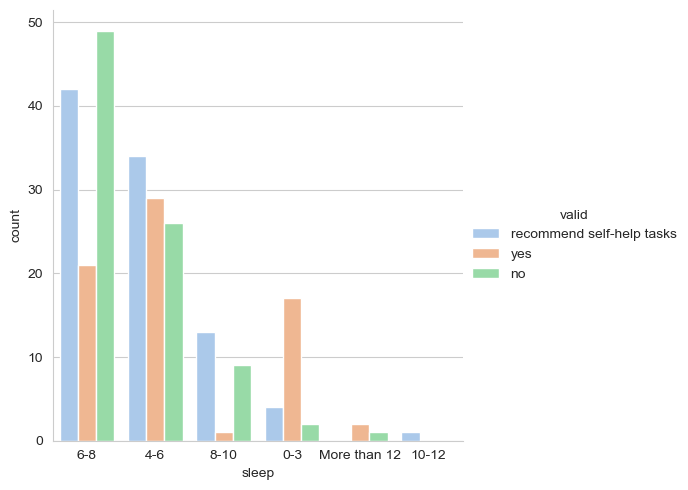

In [18]:
palette=sns.color_palette("pastel")
sns.catplot(
    data=zs, x="sleep", hue="valid", kind="count",
    palette=palette)

The graph above indicates that people who take less than 8 hours of sleep have been recommended therapy the most. So, to have a healthy mental state, subject should take sufficient sleep, ie, more than 8 hours.

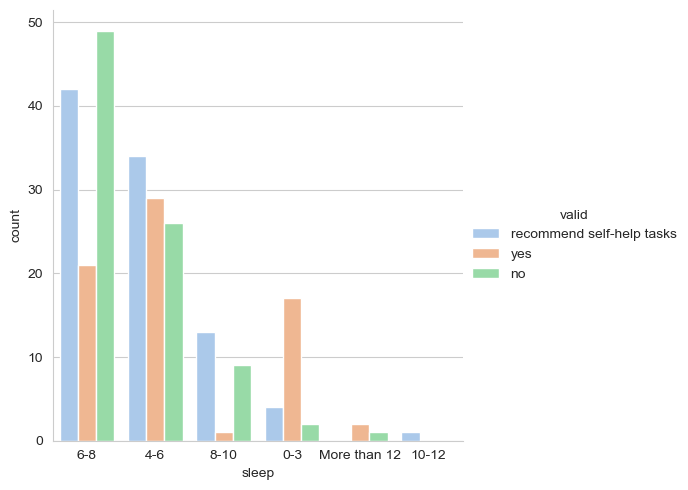

In [19]:
palette=sns.color_palette("pastel")
sns.catplot(
    data=zs, x="sleep", hue="valid", kind="count",
    palette=palette)

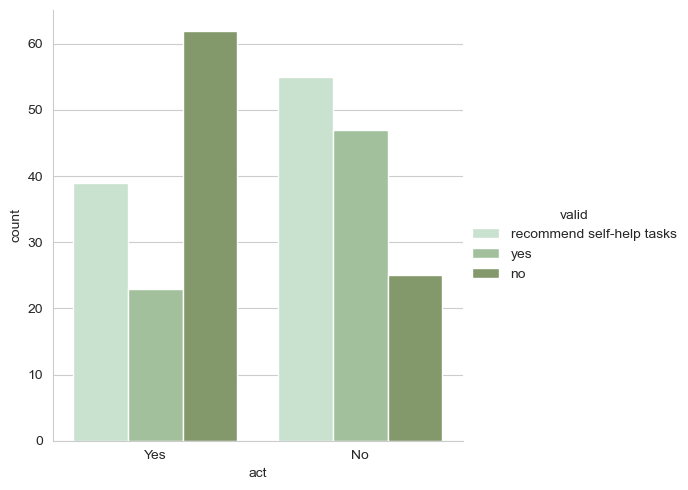

In [20]:
palette=sns.color_palette("ch:10")
sns.catplot(
    data=zs, x="act", hue="valid", kind="count",
    palette=palette)

This graph indicates that people who are not regularly engaging in physical activites and exercising enough, have been recommended self help tasks and therapy, in comparison to people who are. Regularly exercising will not only promote good physical health but good mental health as well.

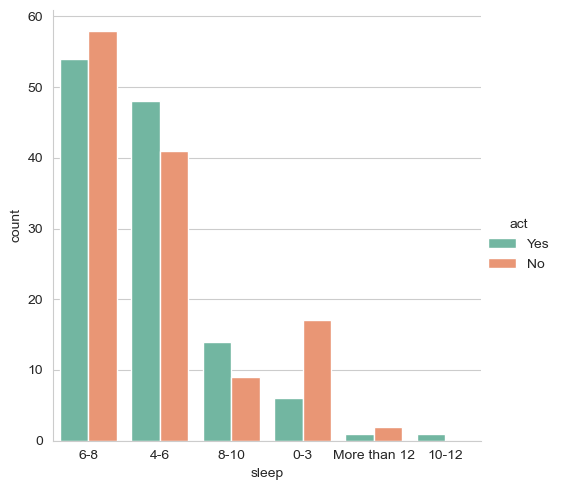

In [21]:
palette=sns.color_palette("Set2")
sns.catplot(
    data=zs, x="sleep", hue="act", kind="count",
    palette=palette)

By the graph, we can study the 4-6 hour range a little more as it seems to be the optimal sleeping hours range allowing the individual to not be tired and be active as well.

## Analysis 3 - Social and Goals

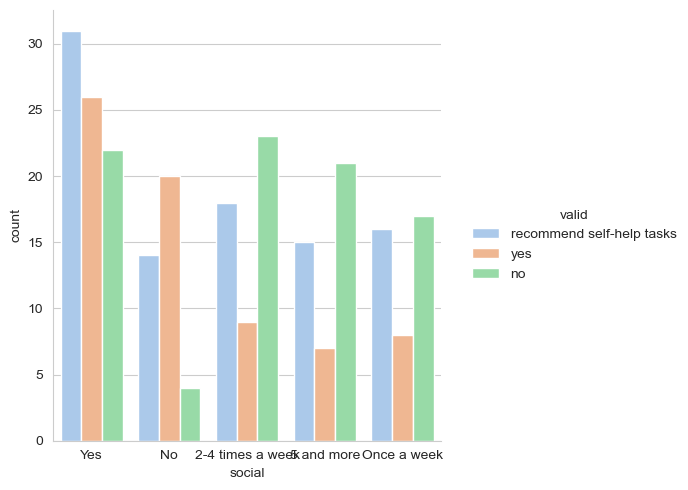

In [22]:
palette=sns.color_palette("pastel")

ax=sns.catplot(
    data=zs, x="social", hue="valid", kind="count", margin_titles=True,
    palette=palette)


According to the graph shown above, people who are frequently socializing are facing negative effects on their mental health and are being recommended therapy and self help tasks. People can sometimes influence a person negatively and bring out your insecurities and worries, which affect the person's mental health.

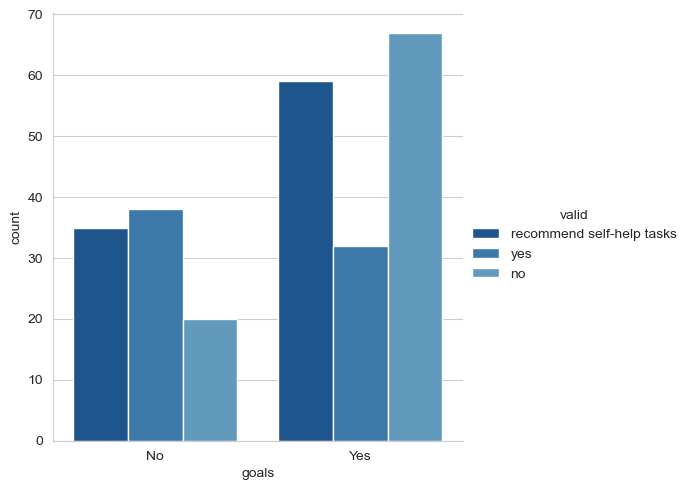

In [23]:
palette=sns.color_palette("Blues_r")
sns.catplot(
    data=zs, x="goals", hue="valid", kind="count",
    palette=palette)

This graph shows that people who have been setting goals for themselves have been facing troubles with their mental health and are recommended self help tasks. This could be because they feel that are putting to much pressure on themselves to achieve those goals. Peolple should set goals but not pressure themselves to achieve it.

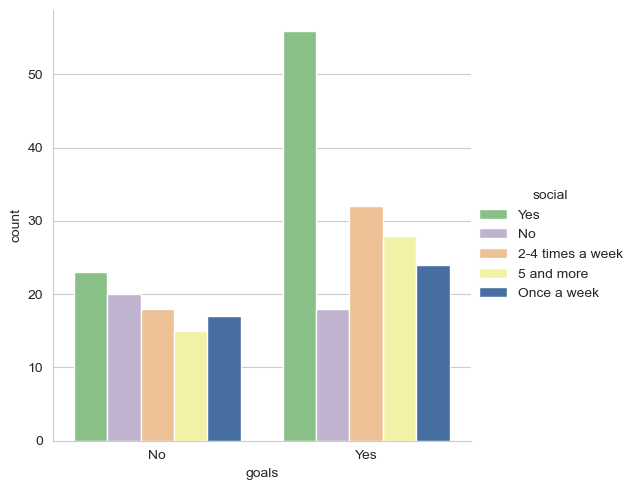

In [24]:
palette=sns.color_palette("Accent")
sns.catplot(
    data=zs, x="goals", hue="social", kind="count",
    palette=palette)

The graph indicates that people who are socializing and connecting with others regularly are also setting personal goals and achieving them. Interacting with like-minded people motivate you to achieve more in life and learn from them as well.

# Analysis 4 - Self Care and Mental Health

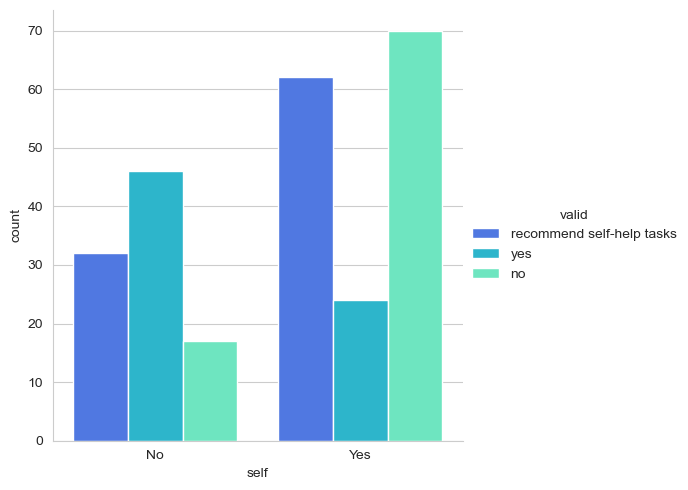

In [25]:
palette=sns.color_palette("rainbow")
sns.catplot(
    data=zs, x="self", hue="valid", kind="count",
    palette=palette)

This graph shows that people who are not practising postive self talk are being recommended to go for therapy and people who are channeling their negative thoughts are in a better place mentally than the others. Focusing on one's negative thoughts can negatively impact your mental health, so we should all continously practise postive self talk.

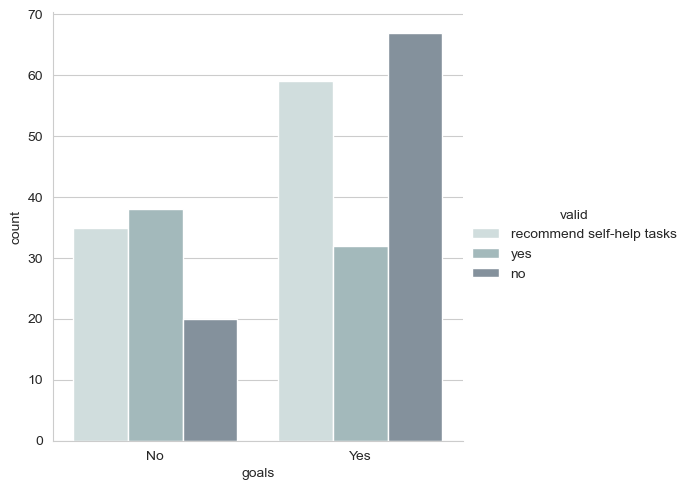

In [26]:
palette=sns.color_palette("bone_r")
sns.catplot(
    data=zs, x="goals", hue="valid", kind="count",
    palette=palette)

The graph shows that people are achieving their personal goals tend to need therapy less. We can also see that they are recommended self help tasks more as they are more open to them. Thus helping people change their mentality to a positive path pushing them to achieve small personal goals will allow them to be more confident and in turn affect their mental health positively

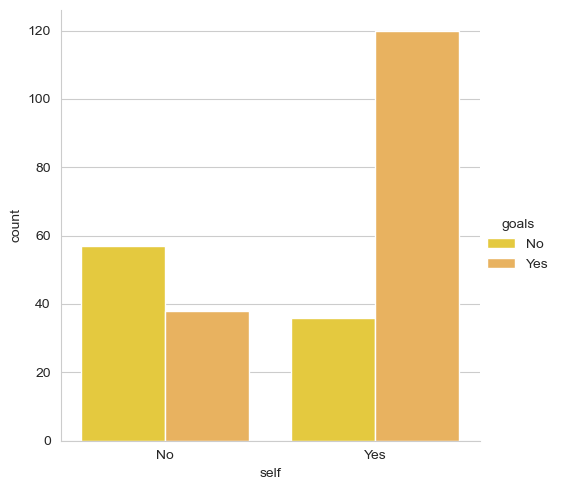

In [27]:
palette=sns.color_palette("spring_r")
sns.catplot(
    data=zs, x="self", hue="goals", kind="count",
    palette=palette)

The graph shows that people who are indeed practising positive self talk have also paid attention to setting goals for themselves as well. It is important to chanel your negative thoughts into positive actions by getting goals.

In [28]:
zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sleep       251 non-null    object 
 1   diet        251 non-null    object 
 2   care        251 non-null    object 
 3   freq        148 non-null    object 
 4   meds        251 non-null    object 
 5   coun        251 non-null    object 
 6   act         251 non-null    object 
 7   break       251 non-null    object 
 8   journ       251 non-null    object 
 9   social      251 non-null    object 
 10  goals       251 non-null    object 
 11  self        251 non-null    object 
 12  symp        251 non-null    object 
 13  age         251 non-null    int64  
 14  gender      251 non-null    object 
 15  dietrate    233 non-null    float64
 16  cry         251 non-null    object 
 17  profession  251 non-null    object 
 18  field       242 non-null    object 
 19  injury      251 non-null    o

In [29]:
zs.columns

Index(['sleep', 'diet', 'care', 'freq', 'meds', 'coun', 'act', 'break',
       'journ', 'social', 'goals', 'self', 'symp', 'age', 'gender', 'dietrate',
       'cry', 'profession', 'field', 'injury', 'negative', 'valid'],
      dtype='object')

In [30]:
zs.head()

,sleep,diet,care,freq,meds,coun,act,break,journ,social,...,symp,age,gender,dietrate,cry,profession,field,injury,negative,valid
0,6-8,Yes,No,NaN,No,No,Yes,No,No,Yes,...,No,20,Female,7.0,Not at all,College Student,Yes,No,1-3,recommend self-help tasks
1,6-8,No,No,NaN,No,No,No,Yes,No,Yes,...,Yes,38,Female,6.0,Not at all,Working professional,Yes,Yes,Not at all,yes
2,6-8,Yes,No,NaN,No,Yes,Yes,No,No,No,...,Yes,19,Male,4.0,Not at all,College Student,NaN,Yes,Not at all,yes
3,6-8,Yes,Yes,Everyday,No,No,Yes,Yes,No,No,...,No,20,Male,9.0,Not at all,School Student,No,Yes,Not at all,no
4,6-8,No,Yes,Everyday,No,No,No,No,No,Yes,...,No,21,Male,7.0,1-2 times,School Student,Yes,Maybe,1-3,recommend self-help tasks


# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
import pickle
categ = ['sleep', 'diet', 'care', 'freq', 'meds', 'coun', 'act', 'break',
        'journ', 'social', 'goals', 'self', 'symp', 'gender', 'cry', 'profession', 'field', 'injury', 'negative',
       'valid']

le_sleep=LabelEncoder()
zs['sleep']=le_sleep.fit_transform(zs['sleep'])
pickle.dump(le_sleep, open('label_encoder1.sav', 'wb'))

le_diet=LabelEncoder()
zs['diet']=le_diet.fit_transform(zs['diet'])
pickle.dump(le_diet, open('label_encoder2.sav', 'wb'))

le_care=LabelEncoder()
zs['care']=le_care.fit_transform(zs['care'])
pickle.dump(le_care, open('label_encoder3.sav', 'wb'))

le_freq=LabelEncoder()
zs['freq']=le_freq.fit_transform(zs['freq'])
pickle.dump(le_freq, open('label_encoder4.sav', 'wb'))

le_meds=LabelEncoder()
zs['meds']=le_meds.fit_transform(zs['meds'])
pickle.dump(le_meds, open('label_encoder5.sav', 'wb'))

le_coun=LabelEncoder()
zs['coun']=le_coun.fit_transform(zs['coun'])
pickle.dump(le_coun, open('label_encoder6.sav', 'wb'))

le_act=LabelEncoder()
zs['act']=le_act.fit_transform(zs['act'])
pickle.dump(le_act, open('label_encoder7.sav', 'wb'))

le_break=LabelEncoder()
zs['break']=le_break.fit_transform(zs['break'])
pickle.dump(le_break, open('label_encoder8.sav', 'wb'))

le_journ=LabelEncoder()
zs['journ']=le_journ.fit_transform(zs['journ'])
pickle.dump(le_journ, open('label_encoder9.sav', 'wb'))

le_social=LabelEncoder()
zs['social']=le_social.fit_transform(zs['social'])
pickle.dump(le_social, open('label_encoder10.sav', 'wb'))

le_goals=LabelEncoder()
zs['goals']=le_goals.fit_transform(zs['goals'])
pickle.dump(le_goals, open('label_encoder11.sav', 'wb'))

le_self=LabelEncoder()
zs['self']=le_self.fit_transform(zs['self'])
pickle.dump(le_self, open('label_encoder12.sav', 'wb'))

le_symp=LabelEncoder()
zs['symp']=le_symp.fit_transform(zs['symp'])
pickle.dump(le_symp, open('label_encoder13.sav', 'wb'))

le_gender=LabelEncoder()
zs['gender']=le_gender.fit_transform(zs['gender'])
pickle.dump(le_gender, open('label_encoder14.sav', 'wb'))

le_cry=LabelEncoder()
zs['cry']=le_cry.fit_transform(zs['cry'])
pickle.dump(le_cry, open('label_encoder15.sav', 'wb'))

le_profession=LabelEncoder()
zs['profession']=le_profession.fit_transform(zs['profession'])
pickle.dump(le_profession, open('label_encoder16.sav', 'wb'))

le_field=LabelEncoder()
zs['field']=le_field.fit_transform(zs['field'])
pickle.dump(le_field, open('label_encoder17.sav', 'wb'))

le_injury=LabelEncoder()
zs['injury']=le_injury.fit_transform(zs['injury'])
pickle.dump(le_injury, open('label_encoder18.sav', 'wb'))

le_negative=LabelEncoder()
zs['negative']=le_negative.fit_transform(zs['negative'])
pickle.dump(le_negative, open('label_encoder19.sav', 'wb'))

le_valid=LabelEncoder()
zs['valid']=le_negative.fit_transform(zs['valid'])


In [32]:
zs

,sleep,diet,care,freq,meds,coun,act,break,journ,social,...,symp,age,gender,dietrate,cry,profession,field,injury,negative,valid
0,3,1,0,3,0,0,1,0,0,4,...,0,20,0,7.0,2,1,1,1,0,1
1,3,0,0,3,0,0,0,1,0,4,...,1,38,0,6.0,2,8,1,2,3,2
2,3,1,0,3,0,1,1,0,0,2,...,1,19,1,4.0,2,1,2,2,3,2
3,3,1,1,2,0,0,1,1,0,2,...,0,20,1,9.0,2,5,0,2,3,0
4,3,0,1,2,0,0,0,0,0,4,...,0,21,1,7.0,0,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3,1,0,3,0,0,0,0,0,3,...,1,22,1,8.0,0,8,1,0,3,1
247,3,1,0,0,0,1,0,0,1,0,...,1,15,0,6.0,1,5,0,1,1,2
248,3,1,1,0,0,0,1,0,0,1,...,0,15,1,8.0,0,5,0,2,3,0
249,3,1,0,3,0,0,0,1,0,3,...,1,49,0,7.0,2,2,1,1,3,1


In [ ]:
zs.corr()

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(zs.corr(),annot=True,linewidth=0.5,fmt='.2f',center=1)
plt.show()

In [ ]:
zs = zs.apply(pd.to_numeric)

In [ ]:
zs.info()

The strong positive correlation between taking breaks & practicing relaxation techniques and journaling or practicing mindfulness is the highest.Thus, the null hypothesis has not been rejected.

# Model Building

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X = zs.drop('valid',axis=1)     
Y = zs['valid']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 - random seed number

x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

In [ ]:
y_test.value_counts()

# Building Base Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import classification_report
models={
    'CART':DecisionTreeClassifier(class_weight='balanced'),
    'RF' : RandomForestClassifier(class_weight='balanced'),
    'Bagging':BaggingClassifier(),
    'ADABoost': AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'SVM': SVC(class_weight='balanced'),
    'CatBoost':CatBoostClassifier(silent=True),
    'LightGBM':lgb.LGBMClassifier(class_weight='balanced')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    #predictions for validation
    y_pred=model.predict(x_test)
       
   #classification report
    print(list(models.keys())[i])
    print(classification_report(y_test, y_pred, digits=4))
    
       
    

### Random forest and XGBoost are the best performing base models. we will perform hyper-parameter tuning on both to choose the best model

# Random Forest Hyper-parameter Tuning

In [ ]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 600, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

class_weight=['balanced',None]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}
pprint(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
rf = RandomForestClassifier(class_weight='balanced')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

print('The best paramters are: {}'.format(rf_random.best_params_))

In [ ]:
#saving the best model
final_rf=rf_random.best_estimator_

### Printing Classification Report

In [ ]:
y_pred=final_rf.predict(x_test)
print(classification_report(y_test, y_pred, digits=4))

### Printing confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=final_rf.predict(x_test)
print(final_rf.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Reccomend Self-help Task","Yes","No"]],
                  columns = [i for i in ["Reccomend Self-help Task","Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="crest")

In [ ]:
#define params
import xgboost as xgb
loss=['hinge','log','modifier_huber','squared_hinge','perceptron']
penalty = ['li','l2','elasticnet']
alpha = [0.0001, 0.001,0.01,0.1,1,10,100,1000]
learnin_rate = ['constant','optimal','invscaling','adaptive']
class_weight = [{0.3,0.5,0.2},{0.3,0.4,0.3}]
eta0 = [1,10,100]

#Hyper-parameter tuning estimator
xg_class = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 1,
gamma = 1,subsample = 0.8, learning_rate = 0.01, max_depth = 3,
alpha = 10,n_estimators = 1000, multilabel_ =True, num_classes = 3)

#Cross Validation
param_distributions = dict(loss = loss, penalty=penalty, alpha=alpha, learnin_rate=learnin_rate, class_weight=class_weight, eta0=eta0)
xgb_random = RandomizedSearchCV(estimator = xg_class, param_distributions=param_distributions, 
 n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)

xgb_random.fit(x_train,y_train)

print('The best paramters are: {}'.format(rf_random.best_params_))






In [ ]:
#saving the best model
final_xgb=xgb_random.best_estimator_

In [ ]:
final_xgb.score(x_test,y_test)

### Printing Classification Report

In [ ]:
y_pred=final_xgb.predict(x_test)
print(classification_report(y_test, y_pred, digits=4))

### Printing confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=final_xgb.predict(x_test)
print(final_xgb.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Reccomend Self-help Task","Yes","No"]],
                  columns = [i for i in ["Reccomend Self-help Task","Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

### since the random forest model works the best on test data after cross validation, saving model

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(final_rf, open(filename, 'wb'))


# # load the model from disk
# final_rf = pickle.load(open(filename, 'rb'))
